# **Práctica 2: Regresión Polinómica**

## Cargar librerías

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## **1. Generación de datos sintéticos**

Genera un conjunto de datos artificiales en el que la relación entre la variable independiente X y la variable dependiente y siga una forma no lineal, concretamente una relación cuadrática. Incluye también un término de ruido aleatorio para simular datos reales.

**Tareas:**
- Crear un vector de valores para X.
- Definir la función cuadrática para  y = 0.5 x2 + x + 2 + ruido
- Añadir ruido aleatorio.
- Representar los datos en un gráfico.


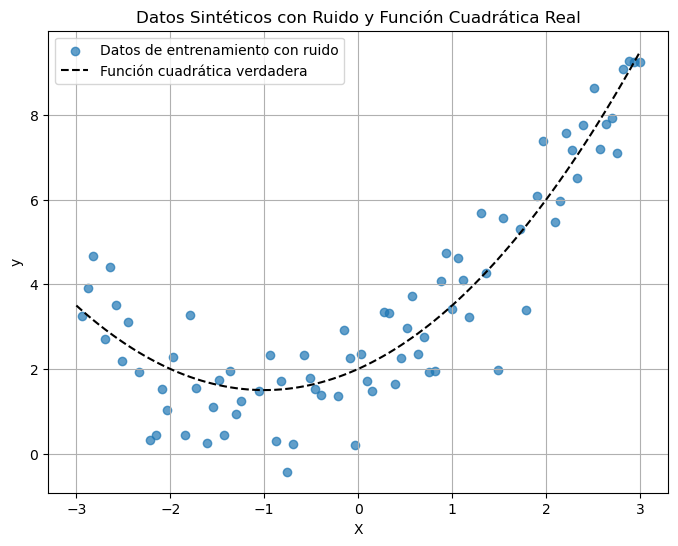

In [26]:
np.random.seed(42)

X = np.linspace(-3, 3, 100).reshape(-1, 1)

y_true = 0.5 * X ** 2 + X + 2

y = y_true + np.random.randn(100, 1)

X_train, X_test, y_train, y_test, y_true_train, y_true_test = train_test_split(
    X, y, y_true, test_size=0.2, random_state=42
)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Datos de entrenamiento con ruido', alpha=0.7)
#plt.scatter(X_test, y_test, label='Datos de prueba con ruido', alpha=0.7)
plt.plot(X, y_true, color='black', linestyle='--', label='Función cuadrática verdadera')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos Sintéticos con Ruido y Función Cuadrática Real')
plt.grid(True)
plt.legend()
plt.show()

## **2. Ajuste de un modelo de regresión lineal simple**

Entrena un modelo de regresión lineal utilizando los datos generados.

**Tareas:**
- Ajustar el modelo lineal.
- Obtener y representar las predicciones.
- Comentar visualmente si el modelo lineal es adecuado.
- Calcular y registrar MSE y R².


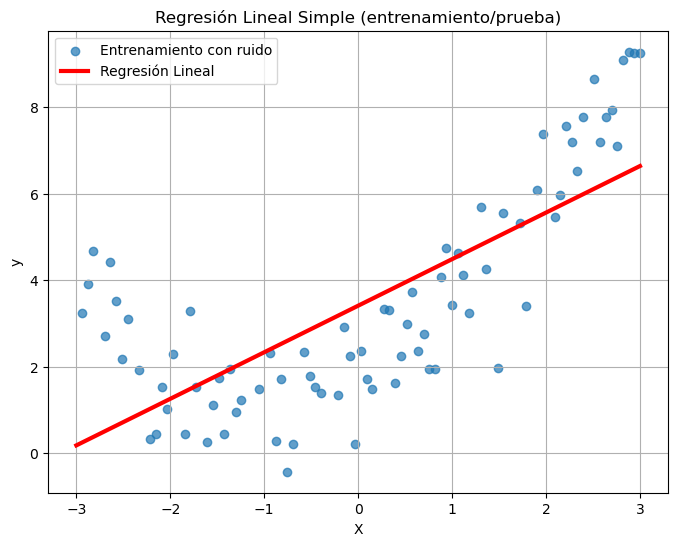


MSE (Regresión Lineal Simple, prueba): 2.41
R² (Regresión Lineal Simple, prueba): 0.41
Conclusión: La regresión lineal simple no se ajusta correctamente a los datos.


In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Representar las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Entrenamiento con ruido', alpha=0.7)
#plt.scatter(X_test, y_test, label='Prueba con ruido', alpha=0.7)
X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_plot = lin_reg.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', linewidth=3, label='Regresión Lineal')
#plt.plot(X, y_true, color='red', linestyle='--', label='Función Cuadrática Verdadera')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal Simple (entrenamiento/prueba)')
plt.grid(True)
plt.legend()
plt.show()

mse_linear = mean_squared_error(y_test, y_test_pred)
r2_linear = r2_score(y_test, y_test_pred)

print(f"\nMSE (Regresión Lineal Simple, prueba): {mse_linear:.2f}")
print(f"R² (Regresión Lineal Simple, prueba): {r2_linear:.2f}")

print("Conclusión: La regresión lineal simple no se ajusta correctamente a los datos.")

## **3. Regresión polinómica de grado 2**

Transforma los datos para incluir términos cuadráticos y ajusta un modelo lineal sobre estas nuevas características.

**Tareas:**
- Generar características polinomiales de grado 2.
- Entrenar el modelo.
- Representar la curva ajustada.
- Comparar sus resultados con los del modelo lineal.


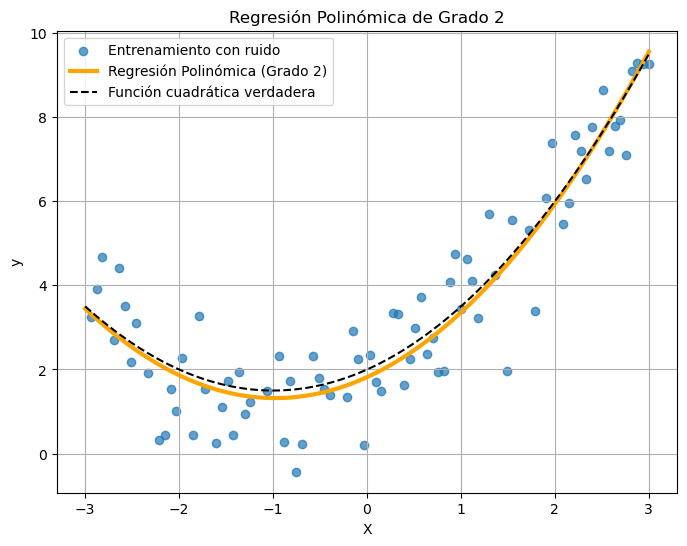


MSE (Regresión Polinómica Grado 2, prueba): 0.62
R² (Regresión Polinómica Grado 2, prueba): 0.85
Conclusión: La regresión polinómica de grado 2 se ajusta mejor a la relación con los datos.


In [28]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)  # Transformar test con la misma transformación

lin_reg_poly2 = LinearRegression()
lin_reg_poly2.fit(X_train_poly, y_train)

y_train_pred = lin_reg_poly2.predict(X_train_poly)
y_test_pred = lin_reg_poly2.predict(X_test_poly)

X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_poly = lin_reg_poly2.predict(X_plot_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Entrenamiento con ruido', alpha=0.7)
#plt.scatter(X_test, y_test, label='Prueba con ruido', alpha=0.7)
plt.plot(X_plot, y_plot_poly, color='orange', linewidth=3, label='Regresión Polinómica (Grado 2)')
plt.plot(X, y_true, color='black', linestyle='--', label='Función cuadrática verdadera')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Polinómica de Grado 2')
plt.grid(True)
plt.legend()
plt.show()

# 5. Calcular MSE y R² sobre los datos de prueba
mse_poly2 = mean_squared_error(y_test, y_test_pred)
r2_poly2 = r2_score(y_test, y_test_pred)

print(f"\nMSE (Regresión Polinómica Grado 2, prueba): {mse_poly2:.2f}")
print(f"R² (Regresión Polinómica Grado 2, prueba): {r2_poly2:.2f}")

print("Conclusión: La regresión polinómica de grado 2 se ajusta mejor a la relación con los datos.")

## **4. Regresión polinómica de grado 10**

**Tareas:**
- Generar características polinomiales de grado 10.
- Entrenar y representar el modelo.
- Analizar visualmente el ajuste obtenido.
- Identificar fenómenos de sobreajuste (overfitting).


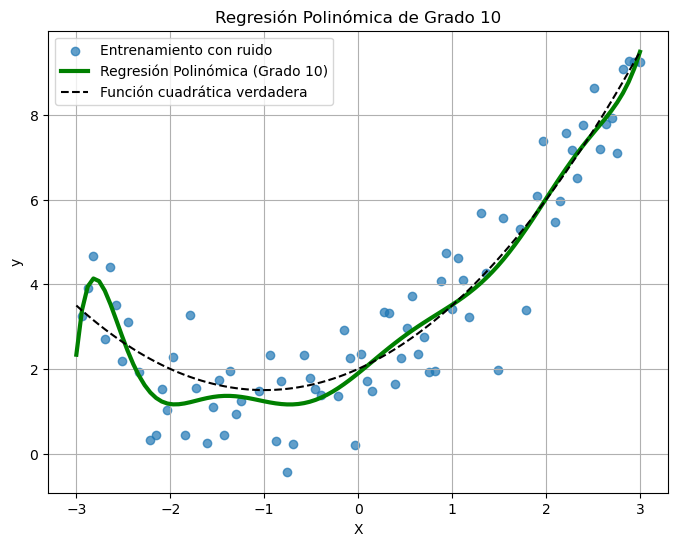


MSE (Regresión Polinómica Grado 10, prueba): 0.82
R² (Regresión Polinómica Grado 10, prueba): 0.80
Conclusión: La regresión polinómica de grado 10 se sobreajusta a su datos de entrenamiento.


In [29]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

lin_reg_poly10 = LinearRegression()
lin_reg_poly10.fit(X_train_poly, y_train)

y_train_pred = lin_reg_poly10.predict(X_train_poly)
y_test_pred = lin_reg_poly10.predict(X_test_poly)

X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_poly = lin_reg_poly10.predict(X_plot_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Entrenamiento con ruido', alpha=0.7)
# plt.scatter(X_test, y_test, label='Prueba con ruido', alpha=0.7)
plt.plot(X_plot, y_plot_poly, color='green', linewidth=3, label='Regresión Polinómica (Grado 10)')
plt.plot(X, y_true, color='black', linestyle='--', label='Función cuadrática verdadera')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Polinómica de Grado 10')
plt.grid(True)
plt.legend()
plt.show()

mse_poly10 = mean_squared_error(y_test, y_test_pred)
r2_poly10 = r2_score(y_test, y_test_pred)

print(f"\nMSE (Regresión Polinómica Grado 10, prueba): {mse_poly10:.2f}")
print(f"R² (Regresión Polinómica Grado 10, prueba): {r2_poly10:.2f}")

print("Conclusión: La regresión polinómica de grado 10 se sobreajusta a su datos de entrenamiento.")

## **5. Comparación de modelos**

Compara los tres modelos: lineal, grado 2 y grado 10.

**Tareas:**
- Representar los tres ajustes.
- Comparar MSE y R².
- Redactar una breve conclusión.

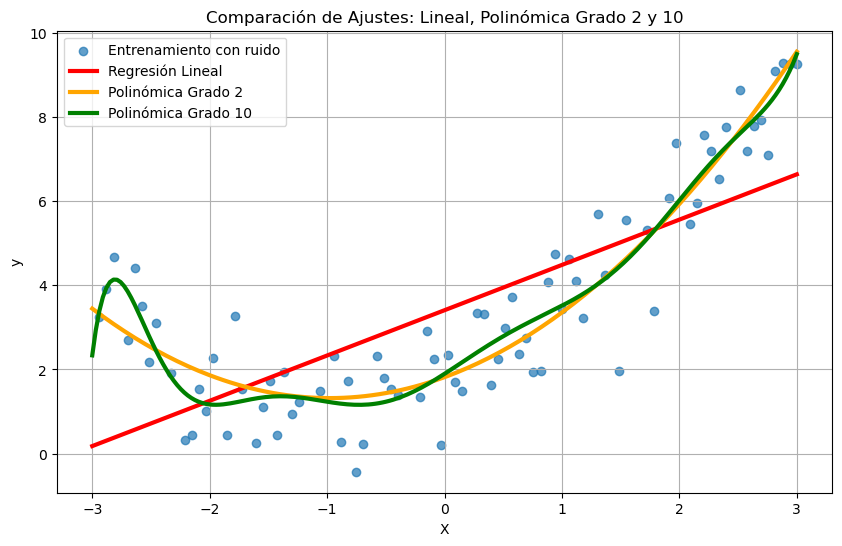

MSE y R² sobre datos de prueba:
Lineal: MSE=2.41, R²=0.41
Polinómica Grado 2: MSE=0.62, R²=0.85
Polinómica Grado 10: MSE=0.82, R²=0.80

Conclusión:
El modelo de Regresión Polinómica de Grado 2 presenta el MSE más bajo
y el R² más alto en los datos de prueba. Ajustandose mejor a la relación
de los datos.


In [30]:
# Crear puntos para graficar curvas suaves y transformar X_plot
X_plot = np.linspace(min(X), max(X), 200).reshape(-1, 1)

poly_features_deg2 = PolynomialFeatures(degree=2, include_bias=False)
poly_features_deg10 = PolynomialFeatures(degree=10, include_bias=False)

# Transformar X_plot para cada modelo
X_plot_poly2 = poly_features_deg2.fit_transform(X_plot)
X_plot_poly10 = poly_features_deg10.fit_transform(X_plot)

# Obtener predicciones para graficar
y_plot_lin = lin_reg.predict(X_plot)
y_plot_poly2 = lin_reg_poly2.predict(X_plot_poly2)
y_plot_poly10 = lin_reg_poly10.predict(X_plot_poly10)

# Graficar los tres ajustes
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Entrenamiento con ruido', alpha=0.7)
# plt.scatter(X_test, y_test, label='Prueba con ruido', alpha=0.7)

plt.plot(X_plot, y_plot_lin, color='red', linewidth=3, label='Regresión Lineal')
plt.plot(X_plot, y_plot_poly2, color='orange', linewidth=3, label='Polinómica Grado 2')
plt.plot(X_plot, y_plot_poly10, color='green', linewidth=3, label='Polinómica Grado 10')

# plt.plot(X, y_true, color='red', linestyle='--', label='Función cuadrática verdadera')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparación de Ajustes: Lineal, Polinómica Grado 2 y 10')
plt.grid(True)
plt.legend()
plt.show()

X_test_poly2 = poly_features_deg2.transform(X_test)
X_test_poly10 = poly_features_deg10.transform(X_test)

mse_lin = mean_squared_error(y_test, lin_reg.predict(X_test))
r2_lin = r2_score(y_test, lin_reg.predict(X_test))

mse_poly2 = mean_squared_error(y_test, lin_reg_poly2.predict(X_test_poly2))
r2_poly2 = r2_score(y_test, lin_reg_poly2.predict(X_test_poly2))

mse_poly10 = mean_squared_error(y_test, lin_reg_poly10.predict(X_test_poly10))
r2_poly10 = r2_score(y_test, lin_reg_poly10.predict(X_test_poly10))

print("MSE y R² sobre datos de prueba:")
print(f"Lineal: MSE={mse_lin:.2f}, R²={r2_lin:.2f}")
print(f"Polinómica Grado 2: MSE={mse_poly2:.2f}, R²={r2_poly2:.2f}")
print(f"Polinómica Grado 10: MSE={mse_poly10:.2f}, R²={r2_poly10:.2f}")

print("\nConclusión:")
print("El modelo de Regresión Polinómica de Grado 2 presenta el MSE más bajo" +
      "\ny el R² más alto en los datos de prueba. Ajustandose mejor a la relación" +
      "\nde los datos.")